<span style="font-size: xx-large; font-weight: bold;">Lecture 2 - Testing Statistical Hypothesises</span>

Ref: https://courses.edx.org/courses/BerkeleyX/Stat_2.3x/2T2014/course/#i4x://BerkeleyX/Stat_2.3x

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binom
from scipy.stats import norm

#%pylab inline

# Testing hypotheses: terminology

## Biased Coin?
Suppose you have tossed a coin 20 times and seen 15 heads.
Is this coin fair (H0), or is it biased towards heads (HA)?

**QUESTIONS**: 
- Assume that the coin is fair (the null hypothesis H0), what is the the probability (P-value) for getting 15 heads or more?
- Is the P-value *statistically significant*?

In [2]:
from scipy.stats import binom
n, p = 20, .5
rv = binom(n, p)

print("# Probabilities on heads >= k")
p_k = dict()
for k in (9, 10, 11, 14, 15):
    p_k[k] = 1.0 - rv.cdf(k)
    print("- P(k > {:2d}) = {:.3f}%".format(k, 100* p_k[k]))

print("\nThe P-value is {:.3f}%".format(100 * p_k[14]))
if (p_k[14] < 0.05):
    print("This is STATISTICAL SIGNIFICANT! Thus, the coin tends to be biased.")
else:
    print("This is NOT STATISTICAL SIGNIFICANT! H0 holds.")

# Probabilities on heads >= k
- P(k >  9) = 58.810%
- P(k > 10) = 41.190%
- P(k > 11) = 25.172%
- P(k > 14) = 2.069%
- P(k > 15) = 0.591%

The P-value is 2.069%
This is STATISTICAL SIGNIFICANT! Thus, the coin tends to be biased.


# Tests for a population proportion

## Red Flowers
In a species of plant, flower color is independent across plants. 

Genetic theory: each plant has a 25% chance of being red-flowering. 

Data: 400 plants of this species; 88 are red-flowering 

**QUESTION**: Is the theory good, or are there too few reds? 

**Exact Answer (Binomial)**

In [3]:
from scipy.stats import binom
n = 400
p = 0.25
k = 88
rv = binom(n, p)
print("P(k<=88) = {:.2f}%".format(100*rv.cdf(88)))

P(k<=88) = 9.08%


**Normal Approximation**

In [4]:
from scipy.stats import norm
mu = 400 * p
sigma = np.sqrt(400 * p * (1-p))
z = (88.5 - mu) / sigma
print("mu = {}, sigma={:.3f}, z ={:.3f}".format(mu, sigma, z))
print("P(z <= {:.3f}) = {:.2f}%".format(z, 100*norm.cdf(z)))

mu = 100.0, sigma=8.660, z =-1.328
P(z <= -1.328) = 9.21%


**Normal Cut-off Z values**

In [5]:
print("ppf(0.05)  = {:6.3f}".format(norm.ppf(0.05)))
print("ppf(0.95)  = {:6.3f}".format(norm.ppf(0.95)))
print("ppf(0.025) = {:6.3f}".format(norm.ppf(0.025)))
print("ppf(0.975) = {:6.3f}".format(norm.ppf(0.975)))

ppf(0.05)  = -1.645
ppf(0.95)  =  1.645
ppf(0.025) = -1.960
ppf(0.975) =  1.960


## Swain vs. Alabama (1962)

- 1962, Talladega County, Alabama, U.S.A.
- Robert Swain, a black man, was convicted of the rape of a white woman and sentenced to death.
- He appealed, all the way to the U.S. Supreme Court, largely on the grounds that every juror in living memory in the County had been white.
- 1965, Swain vs. Alabama: U.S. Supreme Court rejected Swain’s appeal. 

  “The overall percentage disparity has been small, and reflects no studied attempt to include or exclude a specified number of Negroes.” 


- Ref: http://supreme.justia.com/cases/federal/us/380/202/case.html

**The Numbers**
- Only men aged over 21 were eligible to be jurors.
- There were 16,000 such men, of whom 26% were black.
- There were 100 men on Swain’s jury panel; 8 were black. 

- **H0** : The panel was like a SRS of size 100 drawn from 16,000 tickets, consisting of 26% 1 and 74% 0 

**Normal Approximation**

It turned out it is 4 SD below the expectation.
This cannot be a simple random sample.

In [6]:
n, p = 100, 0.26
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
z = (8.5 - mu) / sigma  # Note the use of 8.5 instead of 8.0
print("mu = {}, sigma = {:.3f}".format(mu, sigma))
print("z = {:.2f} SD".format(z))

mu = 26.0, sigma = 4.386
z = -3.99 SD


**Exact Hypergeometric Test**  (for those who are really picky)

In [7]:
# Question: does the population size 16,000 matter?
rv = binom(n, p)
print("P-value = {:.6e}".format(rv.cdf(8)))

P-value = 4.734795e-06


# Scipy Stats Tools

## scipy.stats.binom

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

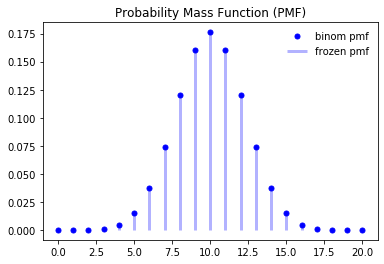

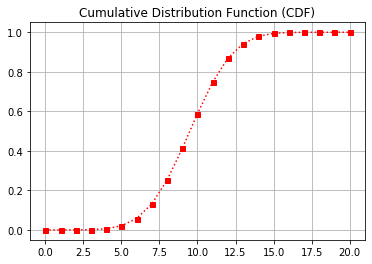

In [8]:
n, p = 20, .5
rv = binom(n, p)

# The probability mass function (PMF)
fig, ax = plt.subplots()
#x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p) + 1)
x = np.arange(n + 1)
ax.plot(x, rv.pmf(x), 'bo', ms=5, label='binom pmf')
ax.vlines(x, 0, rv.pmf(x), colors='b', linestyles='-', lw=3, alpha=0.3,
         label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.title("Probability Mass Function (PMF)")
plt.show()

# The Cumulative Distribution Function (CDF)
fig, ax = plt.subplots()
ax.plot(x, rv.cdf(x), 'rs:', ms=5)
plt.grid()
plt.title("Cumulative Distribution Function (CDF)")
plt.show()

## scipy.stats.norm

- **pdf**(x, loc=0, scale=1): Probability density function.
- **rvs**(loc=0, scale=1, size=1, random_state=None): Random variates.

Ref: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

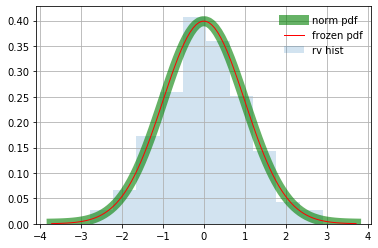

In [9]:
# Initialize the plot
fig, ax = plt.subplots()

# Plot PDF (probability density function)
x = np.linspace(norm.ppf(0.0001), norm.ppf(0.9999), 100)
ax.plot(x, norm.pdf(x),
       'g-', lw=10, alpha=0.6, label='norm pdf')

# Plot with a Random Variable object, freezing mu and sigma
rv = norm()
ax.plot(x, rv.pdf(x), 'r-', lw=1, label='frozen pdf')

# Random
r = norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, label="rv hist")

# Show the plot
ax.legend(loc='best', frameon=False)
plt.grid()
plt.show()